<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/c25fe654e2917f4a6ab7cbac3ce5afea/sep_nsep_ensemble_ts-hog-tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Solar-Energetic-Particle-Event-Prediction-Ensemble-TS-HOG-TB

In [ ]:
!pip install tsfresh
# !pip install sktime
!pip install sktime==0.33.0
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.7 MB/s eta 0:00:00


In [ ]:
# !pip install sktime==0.33.0

In [ ]:
import sktime
print(sktime.__version__)


0.33.0


In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Image

In [ ]:
# With Centriod

In [ ]:
width_MBR = 200
height_MBR = 200

In [ ]:
!pip install requests

# ACTIVE REGION

# SEP

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
import csv
from datetime import datetime
import io

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Binarize the image
            _, thresh = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours on the binarized image
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x, y, w, h = cv2.boundingRect(contours[0]) if contours else (0, 0, 0, 0)
            mbr = cropped_image[y:y+h, x:x+w]  # Get the MBR region

            cropped_images_AR_SEP[index_counter] = mbr
            index_counter += 1
            print(f"MBR for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Further code to continue the logic as required.
# ...


MBR for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
MBR for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
MBR for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
MBR for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
MBR for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
MBR for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
MBR for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
MBR for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
MBR for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
MBR for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
MBR for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
MBR for 2000-11-24 14:50:00 processed and stored as NumPy array with index 11.
MBR for 2000-11-25 00:55:00 processed and stored as NumPy arra

array([[165, 168, 167, ..., 170, 181, 192],
       [161, 162, 165, ..., 175, 181, 189],
       [158, 157, 161, ..., 178, 181, 186],
       ...,
       [171, 168, 165, ..., 156, 161, 168],
       [168, 166, 163, ..., 158, 168, 178],
       [174, 171, 167, ..., 162, 168, 174]], dtype=uint8)
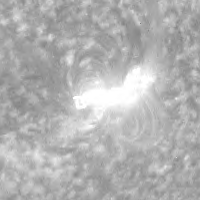

In [ ]:
cropped_images_AR_SEP[0]

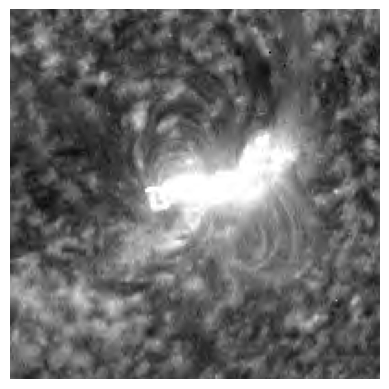

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'cropped_images_AR' contains the processed images
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


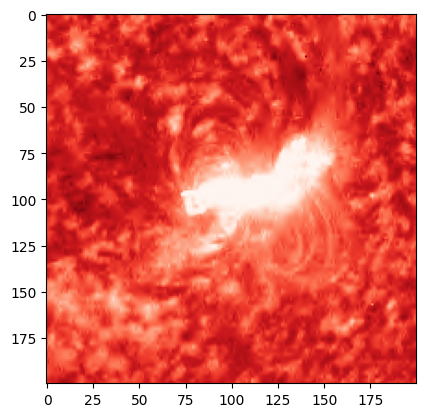

In [ ]:
plt.imshow(cropped_images_AR_SEP[0], cmap='Reds_r')

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Draw contours on the cropped image
            cv2.drawContours(cropped_image, contours, -1, (0, 255, 0), 2)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = cropped_image
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

array([[165, 168, 167, ..., 170, 181, 192],
       [161, 162, 165, ..., 175, 181, 189],
       [158, 157, 161, ..., 178, 181, 186],
       ...,
       [171, 168, 165, ..., 156, 161, 168],
       [168, 166, 163, ..., 158, 168, 178],
       [174, 171, 167, ..., 162, 168, 174]], dtype=uint8)
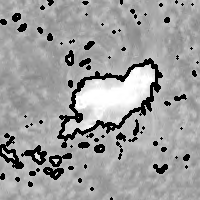

In [ ]:
cropped_images_AR_SEP[0]

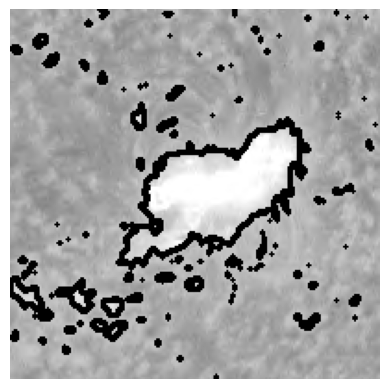

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'cropped_images_AR' contains the processed images
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


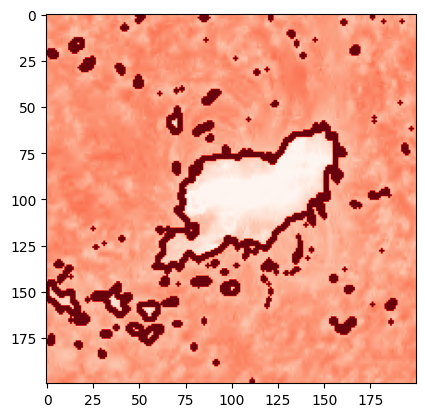

In [ ]:
plt.imshow(cropped_images_AR_SEP[0], cmap='Reds_r')

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
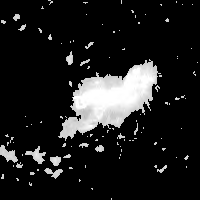

In [ ]:
cropped_images_AR_SEP[0]

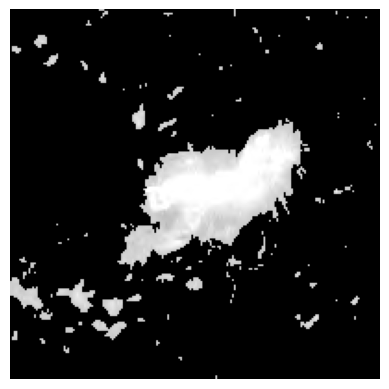

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

## SEP Mask

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

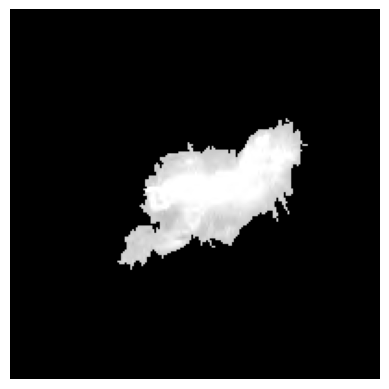

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_SEP = {}

for index, image in cropped_images_AR_SEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_SEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

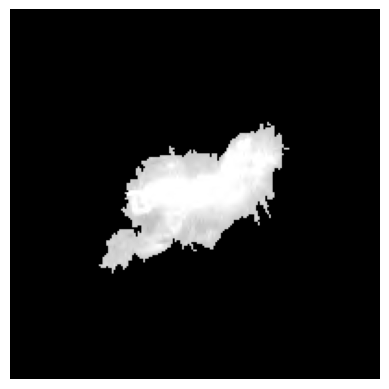

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


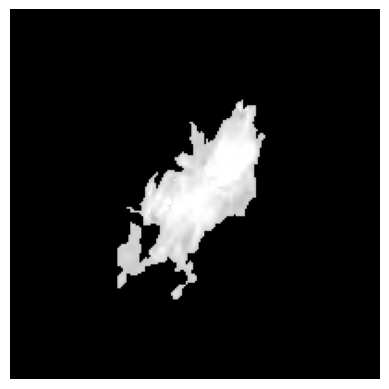

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


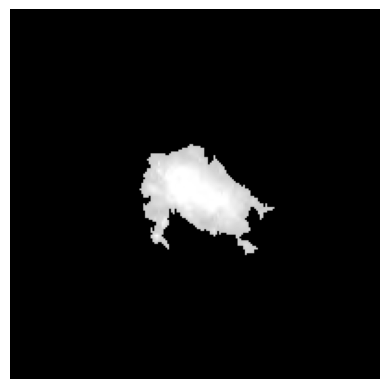

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


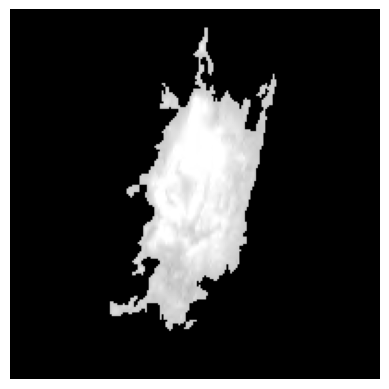

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


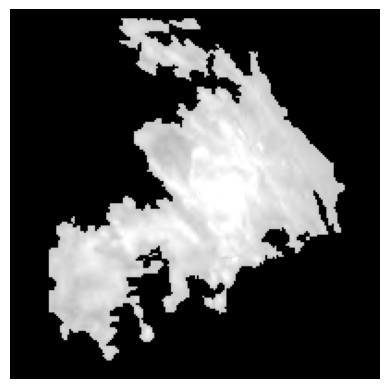

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


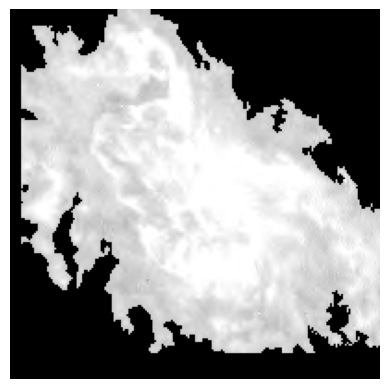

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


# NSEP

## NSEP Mask

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

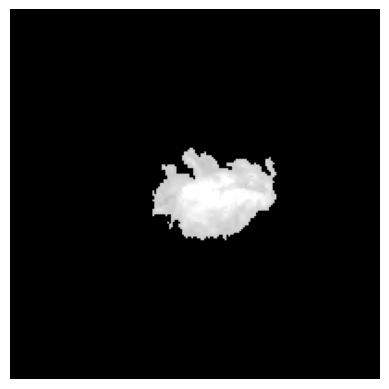

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('/content/sample_data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

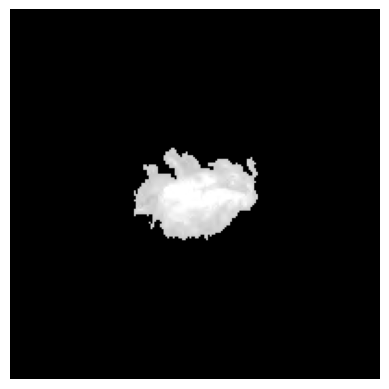

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


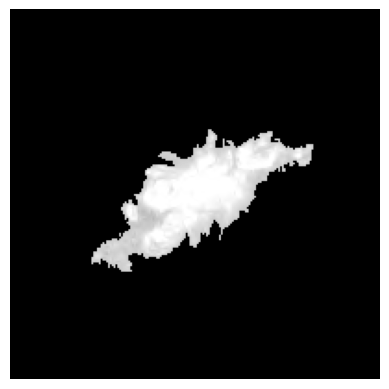

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


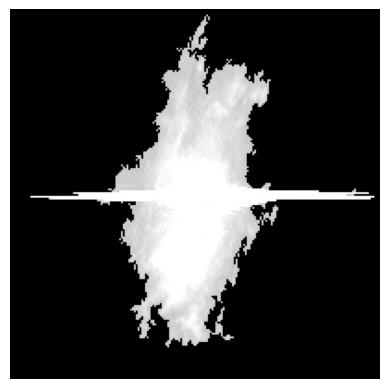

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


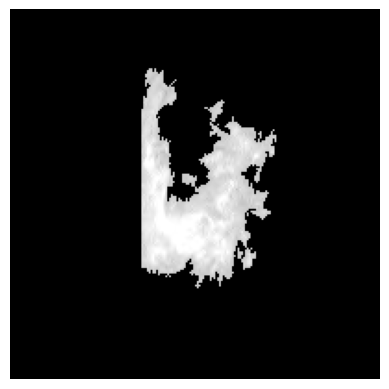

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


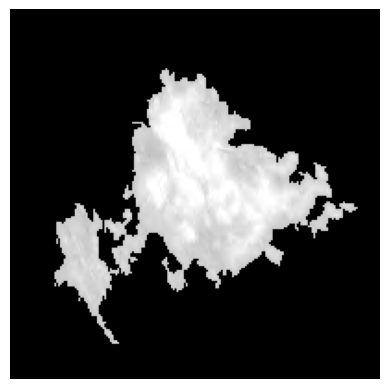

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


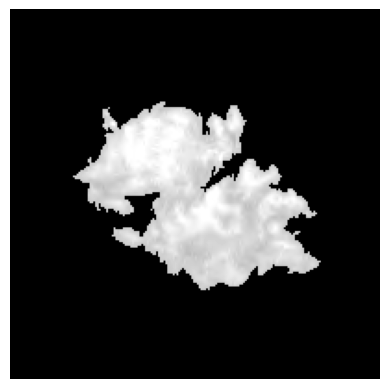

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    # hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4), multichannel=False)
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty list to store accuracy scores
accuracy_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
print(f"Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: {mean_accuracy * 100:.2f}%")


Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: 72.76%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store metrics
accuracy_scores_RF_HOG = []
f1_scores_RF_HOG = []
precision_scores_RF_HOG = []
recall_scores_RF_HOG = []
tss_scores_RF_HOG = []
hss_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_scores_RF_HOG.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_RF_HOG.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_RF_HOG.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_RF_HOG.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    hss_scores_RF_HOG.append(hss)

# Calculate mean accuracy, F1 score, TSS, and HSS
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
mean_f1 = np.mean(f1_scores_RF_HOG)
mean_tss = np.mean(tss_scores_RF_HOG)
mean_hss = np.mean(hss_scores_RF_HOG)

# Output the metrics
print(f"Mean accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")


Mean accuracy: 72.76%
Mean F1 score: 0.73
Mean TSS: 0.46
Mean HSS: 0.45


In [ ]:
# for Ensemble

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in cropped_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in cropped_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X_AR_HOG = np.array(X)
y_AR_HOG = np.array(y)


# Time Series

In [ ]:
import pandas as pd

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,event
0,0.00486,0.00412,0.00509,0.00546,0.00564,0.00509,0.00673,0.00644,0.00644,0.00442,...,0.00681,0.00479,0.00561,0.00586,0.00592,0.00465,0.00543,0.00598,0.00546,SEP
1,0.00509,0.00470,0.00471,0.00501,0.00463,0.00630,0.00546,0.00506,0.00569,0.00442,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
2,0.00411,0.00465,0.00492,0.00516,0.00546,0.00524,0.00509,0.00465,0.00397,0.00427,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
3,0.00434,0.00374,0.00441,0.00465,0.00442,0.00499,0.00386,0.00442,0.00465,0.00434,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
4,0.00614,0.00434,0.00427,0.00434,0.00434,0.00465,0.00564,0.00397,0.00486,0.00442,...,0.00397,0.00398,0.00344,0.00397,0.00367,0.00448,0.00465,0.00442,0.00485,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.00292,0.00318,0.00314,0.00217,0.00304,0.00277,0.00292,0.00247,0.00333,0.00314,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
70,0.00247,0.00246,0.00374,0.00329,0.00329,0.00311,0.00195,0.00329,0.00275,0.00277,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP
71,0.00262,0.00362,0.00262,0.00284,0.00289,0.00239,0.00322,0.00165,0.00268,0.00292,...,0.00299,0.00292,0.00239,0.00275,0.00284,0.00232,0.00268,0.00292,0.00284,NSEP
72,0.00254,0.00307,0.00311,0.00284,0.00269,0.00217,0.00217,0.00247,0.00254,0.00326,...,0.00210,0.00318,0.00217,0.00239,0.00333,0.00254,0.00307,0.00333,0.00277,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
import sktime
print(sktime.__version__)


0.33.0


In [ ]:
# !pip install sktime==0.33.0

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
# from sktime.classification.interval_based import TimeSeriesForest
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_TSF = []
lst_accuBalanced_stratified_TSF = []
lst_f1_stratified_TSF = []
precision_all_TSF = []
recall_all_TSF = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    clf_A = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_TSF.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_TSF.append(balanced_accuracy_score(y_test, pred_A))
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_TSF.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test, pred_A, average='macro')
    precision_all_TSF.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average='macro')
    recall_all_TSF.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp / (tp + fn)) - (fp / (fp + tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)


In [ ]:
import numpy as np

ACC_TSF_TS_Uni = round(np.mean(lst_accu_stratified_TSF), 2)
ACC_TSF_TS_Uni

0.74

In [ ]:
import numpy as np

F1_TSF_TS_Uni = round(np.mean(lst_f1_stratified_TSF), 2)
F1_TSF_TS_Uni

0.74

In [ ]:
import numpy as np

precision_all_Uni = precision_all_TSF

precision_TSF_TS_Uni = round(np.mean(precision_all_TSF), 2)
precision_TSF_TS_Uni

0.75

In [ ]:
import numpy as np

recall_all_Uni = recall_all_TSF

recall_TSF_TS_Uni = round(np.mean(recall_all_TSF), 2)
recall_TSF_TS_Uni

0.74

In [ ]:
import numpy as np

lst_TSS_stratified_A_TSF_Uni = lst_TSS_stratified_A_TSF

TSS_TSF_TS_Uni = round(np.mean(lst_TSS_stratified_A_TSF), 2)
TSS_TSF_TS_Uni

0.49

In [ ]:
import numpy as np

lst_HSS_stratified_A_TSF_Uni = lst_HSS_stratified_A_TSF

HSS_TSF_TS_Uni = round(np.mean(lst_HSS_stratified_A_TSF), 2)
HSS_TSF_TS_Uni

0.49

In [ ]:
# for Ensemble

In [ ]:
import pandas as pd

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,event
0,0.00486,0.00412,0.00509,0.00546,0.00564,0.00509,0.00673,0.00644,0.00644,0.00442,...,0.00681,0.00479,0.00561,0.00586,0.00592,0.00465,0.00543,0.00598,0.00546,SEP
1,0.00509,0.00470,0.00471,0.00501,0.00463,0.00630,0.00546,0.00506,0.00569,0.00442,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
2,0.00411,0.00465,0.00492,0.00516,0.00546,0.00524,0.00509,0.00465,0.00397,0.00427,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
3,0.00434,0.00374,0.00441,0.00465,0.00442,0.00499,0.00386,0.00442,0.00465,0.00434,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
4,0.00614,0.00434,0.00427,0.00434,0.00434,0.00465,0.00564,0.00397,0.00486,0.00442,...,0.00397,0.00398,0.00344,0.00397,0.00367,0.00448,0.00465,0.00442,0.00485,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.00292,0.00318,0.00314,0.00217,0.00304,0.00277,0.00292,0.00247,0.00333,0.00314,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
70,0.00247,0.00246,0.00374,0.00329,0.00329,0.00311,0.00195,0.00329,0.00275,0.00277,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP
71,0.00262,0.00362,0.00262,0.00284,0.00289,0.00239,0.00322,0.00165,0.00268,0.00292,...,0.00299,0.00292,0.00239,0.00275,0.00284,0.00232,0.00268,0.00292,0.00284,NSEP
72,0.00254,0.00307,0.00311,0.00284,0.00269,0.00217,0.00217,0.00247,0.00254,0.00326,...,0.00210,0.00318,0.00217,0.00239,0.00333,0.00254,0.00307,0.00333,0.00277,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y_TS = my_data_all.pop('event')
X_TS = my_data_all

# Tabular

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
sep_data = pd.read_csv("/content/sample_data/SEP_Tabular_6h.csv")
nsep_data = pd.read_csv("/content/sample_data/NSEP_Tabular_6h.csv")

# Add target labels
sep_data['label'] = 'SEP'
nsep_data['label'] = 'NSEP'

# Concatenate dataframes
data = pd.concat([sep_data, nsep_data])

# Extract features and target
X = data[['Sunspots', 'AR', 'Flare Class']]
y = data['label']

# Extract Flare Class types without intensities
X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')

# Create dummy variables for Flare Class
flare_dummies = pd.get_dummies(X['Flare Class'], prefix='Flare')
X = pd.concat([X[['Sunspots', 'AR']], flare_dummies], axis=1)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy values
accuracy_values_SVM = []

# Perform 5-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    svm_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy value to the list
    accuracy_values_SVM.append(accuracy)

# Calculate the mean accuracy
mean_accuracy = sum(accuracy_values_SVM) / len(accuracy_values_SVM)
print("Mean Accuracy:", mean_accuracy)

# Print all accuracy values
print("All Accuracy Values:", accuracy_values_SVM)


Mean Accuracy: 0.7038095238095238
All Accuracy Values: [0.6666666666666666, 0.7333333333333333, 0.8, 0.5333333333333333, 0.7857142857142857]


<ipython-input-73-8138fbee939f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load data
sep_data = pd.read_csv("/content/sample_data/SEP_Tabular_6h.csv")
nsep_data = pd.read_csv("/content/sample_data/NSEP_Tabular_6h.csv")

# Add target labels
sep_data['label'] = 'SEP'
nsep_data['label'] = 'NSEP'

# Concatenate dataframes
data = pd.concat([sep_data, nsep_data])

# Extract features and target
X = data[['Sunspots', 'AR', 'Flare Class']]
y = data['label']

# Extract Flare Class types without intensities
X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')

# Create dummy variables for Flare Class
flare_dummies = pd.get_dummies(X['Flare Class'], prefix='Flare')
X = pd.concat([X[['Sunspots', 'AR']], flare_dummies], axis=1)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics
accuracy_values_SVM = []
f1_scores_SVM = []
precision_scores_SVM = []
recall_scores_SVM = []
tss_scores_SVM = []
hss_scores_SVM = []

# Perform 5-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    svm_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values_SVM.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores_SVM.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_SVM.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_SVM.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_SVM.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    hss_scores_SVM.append(hss)

# Calculate the mean accuracy, F1 score, TSS, and HSS
mean_accuracy = sum(accuracy_values_SVM) / len(accuracy_values_SVM)
mean_f1 = sum(f1_scores_SVM) / len(f1_scores_SVM)
mean_tss = sum(tss_scores_SVM) / len(tss_scores_SVM)
mean_hss = sum(hss_scores_SVM) / len(hss_scores_SVM)

# Print the metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean TSS:", mean_tss)
print("Mean HSS:", mean_hss)

# Print all accuracy values
print("All Accuracy Values:", accuracy_values_SVM)


<ipython-input-74-8321c0f6d88d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')


Mean Accuracy: 0.7038095238095238
Mean F1 Score: 0.6941242864462678
Mean TSS: 0.39999999999999997
Mean HSS: 0.40147871673599633
All Accuracy Values: [0.6666666666666666, 0.7333333333333333, 0.8, 0.5333333333333333, 0.7857142857142857]


In [ ]:
# for Ensemble

import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
sep_data = pd.read_csv("/content/sample_data/SEP_Tabular_6h.csv")
nsep_data = pd.read_csv("/content/sample_data/NSEP_Tabular_6h.csv")

# Add target labels
sep_data['label'] = 'SEP'
nsep_data['label'] = 'NSEP'

# Concatenate dataframes
data = pd.concat([sep_data, nsep_data])

# Extract features and target
X = data[['Sunspots', 'AR', 'Flare Class']]
y = data['label']

# Extract Flare Class types without intensities
X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')

# Create dummy variables for Flare Class
flare_dummies = pd.get_dummies(X['Flare Class'], prefix='Flare')
X = pd.concat([X[['Sunspots', 'AR']], flare_dummies], axis=1)


<ipython-input-75-6225efff209e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Flare Class'] = X['Flare Class'].str.extract(r'([A-Z])')


In [ ]:
# # for non-ensemble methods

# X_0 = X
# y_0 = y

In [ ]:
# np.random.seed(42)

# Ensemble (TS + Polygons)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=100, random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_accuracy_scores_TS_Pol = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

for train_index, test_index in skf.split(X_AR_HOG, y_AR_HOG):
    # Splitting data for both models
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    y_train, y_test = y_AR_HOG[train_index], y_AR_HOG[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())

    # Average the probabilities from both models
    average_proba = (proba_img + proba_ts) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate metrics
    acc = accuracy_score(y_test, final_predictions)
    prec = precision_score(y_test, final_predictions, average='macro')
    rec = recall_score(y_test, final_predictions, average='macro')
    f1 = f1_score(y_test, final_predictions, average='macro')
    auc = roc_auc_score(y_test, average_proba[:, 1], multi_class='ovo')

    # Append results
    ensemble_accuracy_scores_TS_Pol.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)
    auc_scores.append(auc)

# Output the mean of the collected scores
print(f"Mean Accuracy: {np.mean(ensemble_accuracy_scores_TS_Pol) * 100:.2f}%")
print(f"Mean Precision: {np.mean(precision_scores) * 100:.2f}%")
print(f"Mean Recall: {np.mean(recall_scores) * 100:.2f}%")
print(f"Mean F1-Score: {np.mean(f1_scores) * 100:.2f}%")
print(f"Mean AUC: {np.mean(auc_scores):.2f}")

# Print a full classification report for the last fold as an example
print("\nClassification Report for the last fold:")
print(classification_report(y_test, final_predictions))


Mean Accuracy: 76.86%
Mean Precision: 80.12%
Mean Recall: 76.96%
Mean F1-Score: 75.74%
Mean AUC: 0.79

Classification Report for the last fold:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.58      1.00      0.74         7

    accuracy                           0.64        14
   macro avg       0.79      0.64      0.59        14
weighted avg       0.79      0.64      0.59        14



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=100, random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
ensemble_accuracy_scores_TS_Pol1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []
auc_scores1 = []
tss_scores1 = []
hss_scores1 = []

for train_index, test_index in skf.split(X_AR_HOG, y_AR_HOG):
    # Splitting data for both models
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    y_train, y_test = y_AR_HOG[train_index], y_AR_HOG[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())

    # Average the probabilities from both models
    average_proba = (proba_img + proba_ts) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate metrics
    acc = accuracy_score(y_test, final_predictions)
    prec = precision_score(y_test, final_predictions, average='macro')
    rec = recall_score(y_test, final_predictions, average='macro')
    f1 = f1_score(y_test, final_predictions, average='macro')
    auc = roc_auc_score(y_test, average_proba[:, 1], multi_class='ovo')

    # Calculate TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores1.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    hss_scores1.append(hss)

    # Append results
    ensemble_accuracy_scores_TS_Pol1.append(acc)
    precision_scores1.append(prec)
    recall_scores1.append(rec)
    f1_scores1.append(f1)
    auc_scores1.append(auc)

# Output the mean of the collected scores
print(f"Mean Accuracy: {np.mean(ensemble_accuracy_scores_TS_Pol1) * 100:.2f}%")
print(f"Mean Precision: {np.mean(precision_scores1) * 100:.2f}%")
print(f"Mean Recall: {np.mean(recall_scores1) * 100:.2f}%")
print(f"Mean F1-Score: {np.mean(f1_scores1) * 100:.2f}%")
print(f"Mean AUC: {np.mean(auc_scores1):.2f}")
print(f"Mean TSS: {np.mean(tss_scores1):.2f}")
print(f"Mean HSS: {np.mean(hss_scores1):.2f}")

# Additionally, print a full classification report for the last fold as an example
print("\nClassification Report for the last fold:")
print(classification_report(y_test, final_predictions))


Mean Accuracy: 76.86%
Mean Precision: 80.12%
Mean Recall: 76.96%
Mean F1-Score: 75.74%
Mean AUC: 0.79
Mean TSS: 0.54
Mean HSS: 0.54

Classification Report for the last fold:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.58      1.00      0.74         7

    accuracy                           0.64        14
   macro avg       0.79      0.64      0.59        14
weighted avg       0.79      0.64      0.59        14



# Ensemble (TS + Tabular)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
# image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_accuracy_scores_TS_Tab = []  # To store ensemble accuracy only

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    # image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    # proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_ts + proba_svm) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_TS_Tab.append(ensemble_accuracy)

average_ensemble_accuracy = np.mean(ensemble_accuracy_scores_TS_Tab)
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy * 100:.2f}%")


# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + TSF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)  # Adjust based on the observed range of accuracy
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 74.29%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
# image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
ensemble_accuracy_scores_TS_Tab = []
ensemble_f1_scores = []
ensemble_precision_scores = []
ensemble_recall_scores = []
ensemble_tss_scores = []
ensemble_hss_scores = []

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    # image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    # proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_ts + proba_svm) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_TS_Tab.append(ensemble_accuracy)

    # Calculate F1 score and append to the list
    f1_ensemble = f1_score(y_test, final_predictions, average='weighted')
    ensemble_f1_scores.append(f1_ensemble)

    # Calculate precision and recall and append to the lists
    precision_ensemble = precision_score(y_test, final_predictions, average='macro')
    ensemble_precision_scores.append(precision_ensemble)
    recall_ensemble = recall_score(y_test, final_predictions, average='macro')
    ensemble_recall_scores.append(recall_ensemble)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

    # TSS calculation
    tss_ensemble = (tp / (tp + fn)) - (fp / (fp + tn))
    ensemble_tss_scores.append(tss_ensemble)

    # HSS calculation
    hss_ensemble = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    ensemble_hss_scores.append(hss_ensemble)

# Calculate the mean accuracy, F1 score, TSS, and HSS
average_ensemble_accuracy2 = np.mean(ensemble_accuracy_scores_TS_Tab)
mean_f1_ensemble2 = np.mean(ensemble_f1_scores)
mean_tss_ensemble2 = np.mean(ensemble_tss_scores)
mean_hss_ensemble2 = np.mean(ensemble_hss_scores)

# Output the metrics
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy2 * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1_ensemble2:.2f}")
print(f"Mean TSS: {mean_tss_ensemble2:.2f}")
print(f"Mean HSS: {mean_hss_ensemble2:.2f}")

# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores_TS_Tab, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + TSF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)  # Adjust based on the observed range of accuracy
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 74.29%
Mean F1 Score: 0.74
Mean TSS: 0.49
Mean HSS: 0.49


# Ensemble (Polygons + Tabular)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
# ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_accuracy_scores_Pol_Tab = []  # To store ensemble accuracy only

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    # ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    # proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_img + proba_svm) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_Pol_Tab.append(ensemble_accuracy)

average_ensemble_accuracy = np.mean(ensemble_accuracy_scores_Pol_Tab)
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy * 100:.2f}%")


# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + TSF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)  # Adjust based on the observed range of accuracy
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 69.05%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
# ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
ensemble_accuracy_scores_Pol_Tab = []
ensemble_f1_scores = []
ensemble_precision_scores = []
ensemble_recall_scores = []
ensemble_tss_scores = []
ensemble_hss_scores = []

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    # ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    # proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_img + proba_svm) / 2

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_Pol_Tab.append(ensemble_accuracy)

    # Calculate F1 score and append to the list
    f1_ensemble = f1_score(y_test, final_predictions, average='weighted')
    ensemble_f1_scores.append(f1_ensemble)

    # Calculate precision and recall and append to the lists
    precision_ensemble = precision_score(y_test, final_predictions, average='macro')
    ensemble_precision_scores.append(precision_ensemble)
    recall_ensemble = recall_score(y_test, final_predictions, average='macro')
    ensemble_recall_scores.append(recall_ensemble)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

    # TSS calculation
    tss_ensemble = (tp / (tp + fn)) - (fp / (fp + tn))
    ensemble_tss_scores.append(tss_ensemble)

    # HSS calculation
    hss_ensemble = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    ensemble_hss_scores.append(hss_ensemble)

# Calculate the mean accuracy, F1 score, TSS, and HSS
average_ensemble_accuracy3 = np.mean(ensemble_accuracy_scores_Pol_Tab)
mean_f1_ensemble3 = np.mean(ensemble_f1_scores)
mean_tss_ensemble3 = np.mean(ensemble_tss_scores)
mean_hss_ensemble3 = np.mean(ensemble_hss_scores)

# Output the metrics
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy3 * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1_ensemble3:.2f}")
print(f"Mean TSS: {mean_tss_ensemble3:.2f}")
print(f"Mean HSS: {mean_hss_ensemble3:.2f}")

# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores_Pol_Tab, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)  # Adjust based on the observed range of accuracy
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 69.05%
Mean F1 Score: 0.68
Mean TSS: 0.37
Mean HSS: 0.38


# Ensemble (TS + Polygons + Tabular)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_accuracy_scores_TS_Pol_Tab = []  # To store ensemble accuracy only

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_img + proba_ts + proba_svm) / 3

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_TS_Pol_Tab.append(ensemble_accuracy)

average_ensemble_accuracy = np.mean(ensemble_accuracy_scores_TS_Pol_Tab)
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy * 100:.2f}%")


# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + TSF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)  # Adjust based on the observed range of accuracy
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 81.05%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
ensemble_accuracy_scores_TS_Pol_Tab = []
ensemble_f1_scores = []
ensemble_precision_scores = []
ensemble_recall_scores = []
ensemble_tss_scores = []
ensemble_hss_scores = []

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_img + proba_ts + proba_svm) / 3

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_TS_Pol_Tab.append(ensemble_accuracy)

    # Calculate F1 score and append to the list
    f1_ensemble = f1_score(y_test, final_predictions, average='weighted')
    ensemble_f1_scores.append(f1_ensemble)

    # Calculate precision and recall and append to the lists
    precision_ensemble = precision_score(y_test, final_predictions, average='macro')
    ensemble_precision_scores.append(precision_ensemble)
    recall_ensemble = recall_score(y_test, final_predictions, average='macro')
    ensemble_recall_scores.append(recall_ensemble)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

    # TSS calculation
    tss_ensemble = (tp / (tp + fn)) - (fp / (fp + tn))
    ensemble_tss_scores.append(tss_ensemble)

    # HSS calculation
    hss_ensemble = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    ensemble_hss_scores.append(hss_ensemble)

# Calculate the mean accuracy, F1 score, TSS, and HSS
average_ensemble_accuracy4 = np.mean(ensemble_accuracy_scores_TS_Pol_Tab)
mean_f1_ensemble4 = np.mean(ensemble_f1_scores)
mean_tss_ensemble4 = np.mean(ensemble_tss_scores)
mean_hss_ensemble4 = np.mean(ensemble_hss_scores)

# Output the metrics
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy4 * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1_ensemble4:.2f}")
print(f"Mean TSS: {mean_tss_ensemble4:.2f}")
print(f"Mean HSS: {mean_hss_ensemble4:.2f}")

# # Plotting the ensemble accuracy
# plt.figure(figsize=(10, 6))
# plt.boxplot(ensemble_accuracy_scores_TS_Pol_Tab, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
# plt.title('Ensemble Accuracy for Combined Classifiers')
# plt.xticks([1], ['Ensemble (RF + TSF + SVM)'])
# plt.ylabel('Accuracy')
# plt.ylim(0.5, 1.0)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


Average Ensemble Accuracy: 81.05%
Mean F1 Score: 0.81
Mean TSS: 0.62
Mean HSS: 0.62


In [ ]:
ensemble_accuracy_scores_TS_Pol_Tab

[0.8666666666666667,
 0.8666666666666667,
 0.9333333333333333,
 0.6,
 0.7857142857142857]

In [ ]:
ensemble_f1_scores

[0.8666666666666667,
 0.8666666666666667,
 0.9327300150829563,
 0.6,
 0.7754010695187166]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform labels to numeric

# Define models
image_model = RandomForestClassifier(n_estimators=80, random_state=42)
ts_model = TimeSeriesForestClassifier(n_estimators=80, random_state=42)
svm_model = SVC(probability=True, kernel='linear', random_state=42)

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
ensemble_accuracy_scores_TS_Pol_Tab = []
ensemble_f1_scores = []
ensemble_precision_scores = []
ensemble_recall_scores = []
ensemble_tss_scores = []
ensemble_hss_scores = []

for train_index, test_index in skf.split(X, y_encoded):
    # Image and time series data assumed to be split here
    X_img_train, X_img_test = X_AR_HOG[train_index], X_AR_HOG[test_index]
    X_ts_train, X_ts_test = X_TS.iloc[train_index], X_TS.iloc[test_index]
    X_tab_train, X_tab_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train models
    image_model.fit(X_img_train, y_train)
    ts_model.fit(X_ts_train.to_numpy(), y_train)
    svm_model.fit(X_tab_train, y_train)

    # Get probability predictions from each model
    proba_img = image_model.predict_proba(X_img_test)
    proba_ts = ts_model.predict_proba(X_ts_test.to_numpy())
    proba_svm = svm_model.predict_proba(X_tab_test)

    # Average the probabilities from all models
    average_proba = (proba_img + proba_ts + proba_svm) / 3

    # Convert averaged probabilities to final predictions
    final_predictions = np.argmax(average_proba, axis=1)

    # Calculate and store ensemble accuracy
    ensemble_accuracy = accuracy_score(y_test, final_predictions)
    ensemble_accuracy_scores_TS_Pol_Tab.append(ensemble_accuracy)

    # Calculate F1 score and append to the list
    f1_ensemble = f1_score(y_test, final_predictions, average='weighted')
    ensemble_f1_scores.append(f1_ensemble)

    # Calculate precision and recall and append to the lists
    precision_ensemble = precision_score(y_test, final_predictions, average='weighted')
    ensemble_precision_scores.append(precision_ensemble)
    recall_ensemble = recall_score(y_test, final_predictions, average='weighted')
    ensemble_recall_scores.append(recall_ensemble)

    # Confusion matrix for TSS and HSS
    confusion = confusion_matrix(y_test, final_predictions)
    class_tss = []
    class_hss = []
    for i in range(len(confusion)):
        tp = confusion[i, i]
        fn = np.sum(confusion[i, :]) - tp
        fp = np.sum(confusion[:, i]) - tp
        tn = np.sum(confusion) - (tp + fn + fp)

        # TSS calculation
        tss = (tp / (tp + fn)) - (fp / (fp + tn)) if (tp + fn > 0 and fp + tn > 0) else 0
        class_tss.append(tss)

        # HSS calculation
        hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))) if ((tp + fn) * (fn + tn) + (fp + tn) * (tp + fp)) > 0 else 0
        class_hss.append(hss)

    tss_ensemble = np.mean(class_tss)
    hss_ensemble = np.mean(class_hss)
    ensemble_tss_scores.append(tss_ensemble)
    ensemble_hss_scores.append(hss_ensemble)

# Calculate the mean accuracy, F1 score, precision, recall, TSS, and HSS
average_ensemble_accuracy4 = np.mean(ensemble_accuracy_scores_TS_Pol_Tab)
mean_f1_ensemble4 = np.mean(ensemble_f1_scores)
mean_precision_ensemble4 = np.mean(ensemble_precision_scores)
mean_recall_ensemble4 = np.mean(ensemble_recall_scores)
mean_tss_ensemble4 = np.mean(ensemble_tss_scores)
mean_hss_ensemble4 = np.mean(ensemble_hss_scores)

# Output the metrics
print(f"Average Ensemble Accuracy: {average_ensemble_accuracy4 * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1_ensemble4:.2f}")
print(f"Mean Precision: {mean_precision_ensemble4:.2f}")
print(f"Mean Recall: {mean_recall_ensemble4:.2f}")
print(f"Mean TSS: {mean_tss_ensemble4:.2f}")
print(f"Mean HSS: {mean_hss_ensemble4:.2f}")

Average Ensemble Accuracy: 81.05%
Mean F1 Score: 0.81
Mean Precision: 0.82
Mean Recall: 0.81
Mean TSS: 0.62
Mean HSS: 0.62


In [ ]:
ensemble_precision_scores

[0.8666666666666667,
 0.8666666666666667,
 0.9407407407407408,
 0.6,
 0.8499999999999999]

In [ ]:
ensemble_recall_scores

[0.8666666666666667,
 0.8666666666666667,
 0.9333333333333333,
 0.6,
 0.7857142857142857]

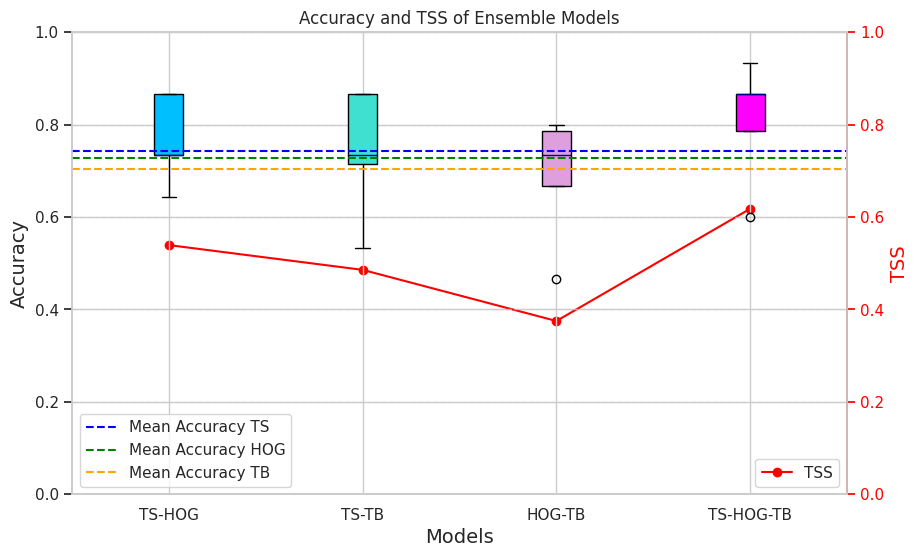

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean values for accuracy
mean_TSF_TS = np.mean(lst_accu_stratified_TSF)
mean_RF_Polygons = np.mean(accuracy_scores_RF_HOG)
mean_SVM_Tabular = np.mean(accuracy_values_SVM)

# Calculate mean values for TSS
mean_tss_ensemble1 = np.mean(tss_scores1)
mean_tss_ensemble2 = np.mean(mean_tss_ensemble2)
mean_tss_ensemble3 = np.mean(mean_tss_ensemble3)
mean_tss_ensemble4 = np.mean(mean_tss_ensemble4)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Box plot for Ensemble 1
ax1.boxplot(ensemble_accuracy_scores_TS_Pol, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='deepskyblue'), medianprops=dict(color='darkblue'))

# Box plot for Ensemble 2
ax1.boxplot(ensemble_accuracy_scores_TS_Tab, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='turquoise'), medianprops=dict(color='darkblue'))

# Box plot for Ensemble 3
ax1.boxplot(ensemble_accuracy_scores_Pol_Tab, positions=[3], patch_artist=True,
            boxprops=dict(facecolor='plum'), medianprops=dict(color='darkblue'))

# Box plot for Ensemble 4
ax1.boxplot(ensemble_accuracy_scores_TS_Pol_Tab, positions=[4], patch_artist=True,
            boxprops=dict(facecolor='magenta'), medianprops=dict(color='darkblue'))

# Add mean accuracy values as horizontal lines with labels
ax1.axhline(mean_TSF_TS, color='blue', linestyle='--', label='Mean Accuracy TS')
ax1.axhline(mean_RF_Polygons, color='green', linestyle='--', label='Mean Accuracy HOG')
ax1.axhline(mean_SVM_Tabular, color='orange', linestyle='--', label='Mean Accuracy TB')

# Labels and titles for the first y-axis (accuracy)
ax1.set_title('Accuracy and TSS of Ensemble Models')
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(['TS-HOG', 'TS-TB', 'HOG-TB', 'TS-HOG-TB'])
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_ylim(0, 1)  # Accuracy axis from 0 to 1
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create the second y-axis for TSS
ax2 = ax1.twinx()
ax2.set_ylabel('TSS', fontsize=14)
ax2.set_ylim(0, 1)  # Adjust the TSS range to be under the boxplots

# Set TSS y-axis to red
ax2.spines['right'].set_color('red')  # Right spine in red
ax2.tick_params(axis='y', colors='red')  # Tick labels in red
ax2.yaxis.label.set_color('red')  # Y-axis label in red

# Plot TSS scores as line plots with markers beneath the boxplots
ax2.plot([1, 2, 3, 4], [mean_tss_ensemble1, mean_tss_ensemble2, mean_tss_ensemble3, mean_tss_ensemble4],
         color='red', marker='o', linestyle='-', label='TSS')

# Adjust plot layout and ensure the TSS line plot is beneath the boxplots
ax1.set_zorder(2)  # Keep the boxplots on top
ax2.set_zorder(1)  # Send the TSS plot behind but make it visible
ax1.patch.set_visible(False)  # Ensure the boxplot's background doesn't cover TSS

# Add legends for accuracy and TSS
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Save as PDF
plt.savefig('accuracy_TSS_Ensemble_with_means_Updated.pdf', dpi=300)

plt.show()
